<a href="https://colab.research.google.com/github/valleY-ku/parents-and-children/blob/main/Practicum_3_6_(9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Если необходимо, установите библиотеку pyreadstat:
#! pip install pyreadstat

# Задание №0: Загрузка и предварительная обработка данных

1. Загрузите данные RLMS (например, в формате .sav) с официального источника [RLMS](https://hse.ru/rlms).

2. Выполните очистку и гармонизацию данных:
- Приведение имён столбцов к нижнему регистру и удаление лишних пробелов.
- Обработка пропусков и рекодирование категориальных переменных.
- Объединение домохозяйственных и индивидуальных анкет (используйте переменные вида `bbidindX`).

In [ ]:
import pandas as pd
import os

file_2023 = os.path.join(os.path.abspath(os.getcwd()), 'r32h_os_71.sav')

try:
    rlms_df = pd.read_spss(file_2023)
except Exception as e:
    print(f"Ошибка загрузки: {e}")

In [ ]:
rlms_df = rlms_df.rename(columns=lambda x: x.strip().lower())
rlms_df.head()

,bbredid_h,bbid_h,aaid_h,zid_h,yid_h,xid_h,wid_h,vid_h,uid_h,tid_h,...,bbf16.4,bbf16.5,bbg1.1,bbg1.2,bbg2,bbg3,bbg4,bbg5,bbg6,bbg7
0,663.0,10003.0,10003.0,10003.0,10003.0,10003.0,10003.0,10003.0,10003.0,10003.0,...,"Нет, не было",НУЖДЫ НЕ БЫЛО,Нет,Нет,Дружеское и заинтересованное,Не очень хорошо,Чувствовал себя свободно,"Несообразительный, нуждался в повторном чтении...","Значительно более искренен и открыт, чем больш...",Надежная
1,666.0,10014.0,10014.0,10014.0,10014.0,10014.0,10014.0,10014.0,10014.0,10014.0,...,"Нет, не было","Нет, не было",Нет,Нет,Дружеское и заинтересованное,Хорошо,Чувствовал себя свободно,"Сообразителен, как большинство респондентов","Искренен и открыт так же, как большинство респ...",Надежная
2,667.0,10016.0,10016.0,10016.0,10016.0,10016.0,10016.0,10016.0,10016.0,10016.0,...,"Нет, не было","Нет, не было",Да,Да,Дружеское и заинтересованное,Не очень хорошо,Чувствовал себя свободно,"Несообразительный, нуждался в повторном чтении...","Очень закрытый, неискренний",Записано недостаточно информации
3,668.0,10018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Нет, не было","Нет, не было",Нет,Нет,Нетерпеливое и беспокойное,Не очень хорошо,Нервничал,"Несообразительный, нуждался в повторном чтении...","Очень закрытый, неискренний",Записано недостаточно информации
4,669.0,10023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Нет, не было","Нет, не было",Да,Нет,Не особенно заинтересованное,Хорошо,Чувствовал себя свободно,"Сообразителен, как большинство респондентов","Очень закрытый, неискренний",Записано недостаточно информации


Вспомогательная функция для анализа данных:

In [ ]:
def harmonize_data(df):
    df = df.rename(columns=lambda x: x.strip().lower())
    df = df.dropna(axis=1, how='all')
    for col in df.select_dtypes(include='number').columns:
        df[col] = df[col].fillna(df[col].mean())

    for col in df.select_dtypes(include='category').columns:
        df[col] = df[col].cat.add_categories('missing').fillna('missing')

    return df

In [ ]:
rlms_df = harmonize_data(rlms_df)
rlms_df.head()

,bbredid_h,bbid_h,aaid_h,zid_h,yid_h,xid_h,wid_h,vid_h,uid_h,tid_h,...,bbf16.4,bbf16.5,bbg1.1,bbg1.2,bbg2,bbg3,bbg4,bbg5,bbg6,bbg7
0,663.0,10003.0,1.000300e+04,1.000300e+04,1.000300e+04,1.000300e+04,1.000300e+04,1.000300e+04,1.000300e+04,10003.000000,...,"Нет, не было",НУЖДЫ НЕ БЫЛО,Нет,Нет,Дружеское и заинтересованное,Не очень хорошо,Чувствовал себя свободно,"Несообразительный, нуждался в повторном чтении...","Значительно более искренен и открыт, чем больш...",Надежная
1,666.0,10014.0,1.001400e+04,1.001400e+04,1.001400e+04,1.001400e+04,1.001400e+04,1.001400e+04,1.001400e+04,10014.000000,...,"Нет, не было","Нет, не было",Нет,Нет,Дружеское и заинтересованное,Хорошо,Чувствовал себя свободно,"Сообразителен, как большинство респондентов","Искренен и открыт так же, как большинство респ...",Надежная
2,667.0,10016.0,1.001600e+04,1.001600e+04,1.001600e+04,1.001600e+04,1.001600e+04,1.001600e+04,1.001600e+04,10016.000000,...,"Нет, не было","Нет, не было",Да,Да,Дружеское и заинтересованное,Не очень хорошо,Чувствовал себя свободно,"Несообразительный, нуждался в повторном чтении...","Очень закрытый, неискренний",Записано недостаточно информации
3,668.0,10018.0,1.372632e+06,1.383243e+06,1.296609e+06,1.219792e+06,1.125919e+06,1.031607e+06,1.027145e+06,847972.220528,...,"Нет, не было","Нет, не было",Нет,Нет,Нетерпеливое и беспокойное,Не очень хорошо,Нервничал,"Несообразительный, нуждался в повторном чтении...","Очень закрытый, неискренний",Записано недостаточно информации
4,669.0,10023.0,1.372632e+06,1.383243e+06,1.296609e+06,1.219792e+06,1.125919e+06,1.031607e+06,1.027145e+06,847972.220528,...,"Нет, не было","Нет, не было",Да,Нет,Не особенно заинтересованное,Хорошо,Чувствовал себя свободно,"Сообразителен, как большинство респондентов","Очень закрытый, неискренний",Записано недостаточно информации


# Задание 4: Дети и родители

В этом задании вам нужно изучить, как характеристики родителей влияют на характеристики их детей. Для этого вы будете использовать данные опроса RLMS за последние 10 доступных лет (с 2014 по 2023 гг.).

Данные RLMS имеют панельную структуру, то есть, каждый год организаторы исследования стараются опрашивать одних и тех же людей. Это позволяет изучать не просто характеристики индивидов в данный год, но и их динамику, благодаря чему мы можем формулировать и проверять очень нетривиальные гипотезы. Для того, чтобы найти данного человека в опроснике за другой год, вы можете воспользоваться переменной «idind» или переменными вида «**X**id_i» (для ID индивида), «**X**id_h» (для ID его домохозяйства), где X – номер волны опроса. Случается так, что индивиды перестают участвовать в опросе (и тогда организаторы находят новых участников), в этом случае для них не получится найти данные за последующие годы, а для вновь добавленных в исследование респондентов – их предысторию. Это важный момент, который стоит учитывать.

Для того, чтобы понять родственные связи членов домохозяйства, мы будем использовать переменные из опросника по домохозяйствам вида «bbb**X**.9.**Y**»,  где X и Y – номера членов домохозяйства. Из этих показателей несложно восстановить полную структуру семьи.

Для того, чтобы подтянуть к характеристикам домохозяйства данные по отдельным его членам, вы можете использовать переменные вида «bbidind**X**», (где X – номер члена домохозяйства): в них находятся идентификационные номера членов семьи, по которым их можно найти в опроснике по индивидам.

### 4.3 Формулировка и проверка гипотез IV

1. Изучите доступные в RLMS данные и сформулируйте три разные гипотезы о том, какие характеристики родителей могут влиять на те же самые (или другие!) характеристики детей (помимо образования). При формулировке гипотез обязательно приведите ссылки на релевантные, актуальные и авторитетные источники (научные исследования по схожей проблематике на зарубежном статистическом материале).

2. Проверьте ваши гипотезы на данных. Для этого сформулируйте необходимые разрезы данных, рассчитайте статистики, визуализируйте (в виде графиков или таблиц) ваши расчёты. Сделайте вывод о том, как результаты соотносятся со сформулированными гипотезами.

3. Кратко охарактеризуйте результаты вашего исследования в рамках одного абзаца текста.

## Доход родителей и здоровье детей

**Гипотеза:** Более высокий доход родителей напрямую влияет на физическое здоровье детей. Семьи с высоким доходом могут обеспечить своим детям лучший доступ к медицинскому обслуживанию, что способствует их физическому благополучию.

Подтверждающие исследования:
- Nancy Kong, Shelley Phipps, Barry Watson,
Parental economic insecurity and child health,
Economics & Human Biology, Volume 43, 2021, 101068, ISSN 1570-677X,
https://doi.org/10.1016/j.ehb.2021.101068.
- Laura J. Samuel, Martha Abshire Saylor, Melissa Lutz, Monica Y. Choe, Rhonda Smith Wright, Boeun Kim, Sarah L. Szanton, Manka Nkimbeng, Fernando Mena-Carrasco, Rachel Austin, Eliana M. Perrin,
Financial Strain and Child Health: Measures and Evidence from a Systematic Literature Review, AJPM Focus, 2025, 100337,
ISSN 2773-0654,
https://doi.org/10.1016/j.focus.2025.100337.

Рассмотрим за 10 лет

In [ ]:
# Классификация дохода
def get_income_group(income):
    if pd.isna(income):
        return None
    if income < MROT:
        return '<MROT'
    if income <= AVERAGE_INCOME:
        return 'MROT-AVERAGE_INCOME'
    return '>AVERAGE_INCOME'


In [ ]:
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Константы
TARGET_CHILDREN = 20000  # Базовое количество детей для сравнения
MROT = 32000
AVERAGE_INCOME = 90000
MAX_CHILDREN_PER_FAMILY = 20

# Настройки анализа
income_groups = {
    '<MROT': {'unmet_need': 0, 'children': 0},
    'MROT-AVERAGE_INCOME': {'unmet_need': 0, 'children': 0},
    '>AVERAGE_INCOME': {'unmet_need': 0, 'children': 0}
}

keys = {
    32: 'bb', 31: 'aa', 30: 'z', 29: 'y', 28: 'x',
    27: 'w', 26: 'v', 25: 'u', 24: 't', 23: 's'
}

# Обработка данных
for wave in range(23, 33):
    prefix = keys[wave]

    hh_pattern = f'r{wave}h*.sav'  # household файлы
    ind_pattern = f'r{wave}i*.sav'  # individual файлы

    hh_files = glob.glob(hh_pattern)
    ind_files = glob.glob(ind_pattern)

    hh_file = hh_files[0]
    ind_file = ind_files[0]

    # Загрузка данных
    df_hh, _ = pyreadstat.read_sav(hh_file)
    df_ind, _ = pyreadstat.read_sav(ind_file)

    # Приведение названий колонок к нижнему регистру
    df_hh.columns = df_hh.columns.str.lower()
    df_ind.columns = df_ind.columns.str.lower()

    # Подготовка household данных
    hh_id = f'{prefix}a3'
    income_var = f'{prefix}f14'
    need_vars = [f'{prefix}f16.{i}' for i in [1, 2, 3]]  # Переменные нужды

    df_hh = df_hh.rename(columns={hh_id: 'family_id', income_var: 'income'})
    df_hh['income_group'] = df_hh['income'].apply(get_income_group)

    # Подсчет неудовлетворенных нужд
    for need_var in need_vars:
        if need_var in df_hh.columns:
            # Проверяем разные форматы ответов
            unmet_mask = (
                    (df_hh[need_var] == 1) |  # Числовой формат
                    (df_hh[need_var].astype(str).str.contains('Да, было|да|1', case=False, na=False))
                # Текстовый формат
            )
            # Суммируем по группам
            unmet_counts = df_hh[unmet_mask].groupby('income_group').size()
            for group, count in unmet_counts.items():
                if group in income_groups:
                    income_groups[group]['unmet_need'] += count

    # Подготовка individual данных
    ind_id = f'{prefix}h3'
    children_var = next(
        (col for col in df_ind.columns
         if col.startswith(prefix) and ('j72' in col or 'h5' in col or 'h6' in col)),
        None
    )

    if children_var:
        df_ind = df_ind.rename(columns={ind_id: 'family_id', children_var: 'num_children'})
        df_ind['num_children'] = pd.to_numeric(df_ind['num_children'], errors='coerce')

        # Исключаем специальные коды, пропущенные значения и семьи с >20 детей
        df_ind = df_ind[~df_ind['num_children'].isin([99999997.0, 99999998.0, 99999999.0])]
        df_ind = df_ind[df_ind['num_children'].notna()]
        df_ind = df_ind[df_ind['num_children'] <= MAX_CHILDREN_PER_FAMILY]  # Фильтрация семей с >20 детей

        # Объединение с данными о доходе
        merged = pd.merge(
            df_ind[['family_id', 'num_children']],
            df_hh[['family_id', 'income_group']].drop_duplicates(),
            on='family_id',
            how='inner'
        )

        # Суммирование детей по группам (исключая NaN после фильтрации)
        children_counts = merged.groupby('income_group')['num_children'].sum()
        for group, count in children_counts.items():
            if group in income_groups and not pd.isna(count):
                income_groups[group]['children'] += int(count)

In [ ]:
# Расчет нормированных значений
results = pd.DataFrame.from_dict(income_groups, orient='index')
results['unmet_per_20k'] = (results['unmet_need'] / results['children']) * TARGET_CHILDREN

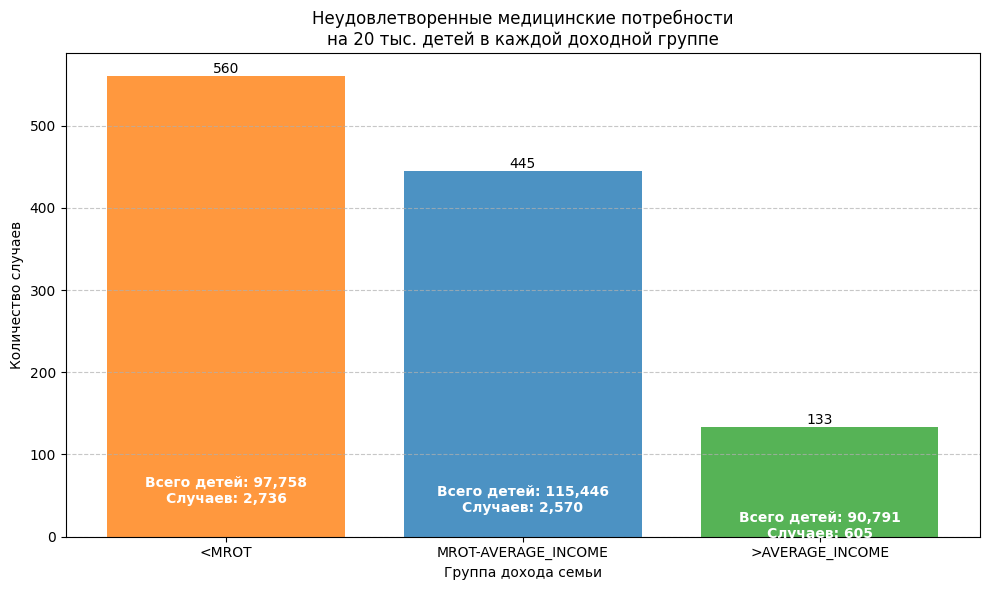

In [ ]:
# Визуализация
plt.figure(figsize=(10, 6))
bars = plt.bar(results.index, results['unmet_per_20k'],
               color=['#ff7f0e', '#1f77b4', '#2ca02c'], alpha=0.8)

plt.title('Неудовлетворенные медицинские потребности\nна 20 тыс. детей в каждой доходной группе')
plt.xlabel('Группа дохода семьи')
plt.ylabel('Количество случаев')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавление значений на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{height:,.0f}',
             ha='center', va='bottom')

# Добавление информации об абсолютных значениях
for i, group in enumerate(results.index):
    plt.text(i, results.loc[group, 'unmet_per_20k'] * 0.1,
             f"Всего детей: {results.loc[group, 'children']:,.0f}\n"
             f"Случаев: {results.loc[group, 'unmet_need']:,.0f}",
             ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Вывод таблицы с результатами
print("\nДетальные результаты:")
print(results[['children', 'unmet_need', 'unmet_per_20k']])


Детальные результаты:
                     children  unmet_need  unmet_per_20k
<MROT                   97758        2736     559.749586
MROT-AVERAGE_INCOME    115446        2570     445.229804
>AVERAGE_INCOME         90791         605     133.273122


**Выводы:**
Семьи с низким уровнем дохода чаще сталкиваются с трудностями в обеспечении детей необходимыми медицинскими услугами. А семьи с более высоким заработком, наоборот имеют больше ресурсов для получения качественной медицины, если смотреть данные за 10 лет. Из исследований приведенных выше, мы видим что, наша гипотеза подтверждена, что связано с ограниченным доступом к качественной медицине, в отличие от семей с более высоким уровнем дохода, которые могут позволить частные медицинские услуги.

# Семейное положение родителей и социальная адаптация детей

**Гипотеза:** Нет прямой связи между показателями супружеских отношений и детской адаптацией. Однако есть другие опосредующие эффекты. В нашем исследовании мы подтвердим именно первое высказывания, не затрагивая эффекты.

Подтверждающие исследования:
- Yujin Lee, Kyungmin Kim, Anne Douglass, Songtian Zeng,
Pathways from marital relationships to children's social-emotional development in Korea: The role of parenting and social support,
Early Childhood Research Quarterly, Volume 65, 2023, Pages 342-351, ISSN 0885-2006,
https://doi.org/10.1016/j.ecresq.2023.07.011.

In [ ]:
# Функция для определения группы брачного статуса
def get_marital_group(status):
    if status in [1, 5, 6]:
        return 'Одинокие родители'
    elif status == 4:
        return 'Разведен'
    elif status in [2, 3]:
        return 'Родители в браке'
    return None

In [ ]:
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Словарь для префиксов переменных по волнам
keys = {
    32: 'bb', 31: 'aa', 30: 'z', 29: 'y', 28: 'x',
    27: 'w', 26: 'v', 25: 'u', 24: 't', 23: 's'
}

# Словари для хранения агрегированных результатов
marital_status_counts = {}
sport_answer_counts = {'Да': 0, 'Нет': 0}
total_parents = 0

# Обработка каждой волны
for wave in range(23, 33):
    file_pattern = f'r{wave}i*.sav'
    file_list = glob.glob(file_pattern)
    file_path = file_list[0]
    df, meta = pyreadstat.read_sav(file_path)

    prefix = keys.get(wave, '')
    child_var = f'{prefix}j72.171'
    marst_var = f'{prefix}_marst'
    sport_var = f'{prefix}k8.18'

    # 1. Подсчет родителей
    if child_var in df.columns:
        parents_wave = df[df[child_var] == 1].copy()
        total_parents += len(parents_wave)

        # 2. Анализ брачного статуса родителей
        if marst_var in parents_wave.columns:
            parents_wave['marital_group'] = parents_wave[marst_var].apply(get_marital_group)
            wave_counts = parents_wave['marital_group'].value_counts().to_dict()
            for group, count in wave_counts.items():
                marital_status_counts[group] = marital_status_counts.get(group, 0) + count

    # 3. Анализ вопроса о социальной адаптации ребенка
    if sport_var in df.columns:
        valid_responses = df[sport_var].replace([99999997, 99999998, 99999999], pd.NA).dropna()
        sport_answer_counts['Да'] += (valid_responses == 1).sum()
        sport_answer_counts['Нет'] += (valid_responses == 2).sum()

    # Явно удаляем DataFrame, чтобы освободить память
    del df
    del meta

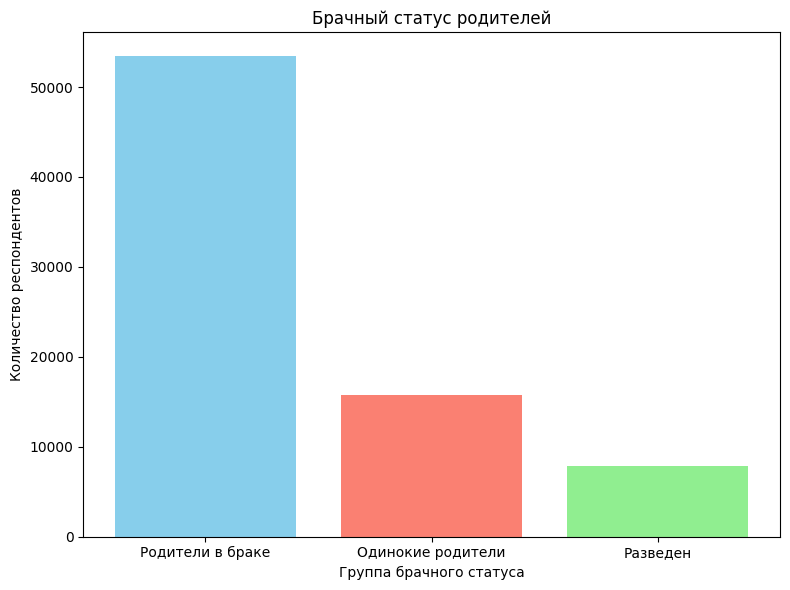

In [ ]:
# Построение графика семейного статуса
if marital_status_counts:
    labels_marital = list(marital_status_counts.keys())
    counts_marital = list(marital_status_counts.values())
    plt.figure(figsize=(8, 6))
    plt.bar(labels_marital, counts_marital, color=['skyblue', 'salmon', 'lightgreen', 'lightcoral'])
    plt.title('Брачный статус родителей за 10 лет')
    plt.xlabel('Группа брачного статуса')
    plt.ylabel('Количество респондентов')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

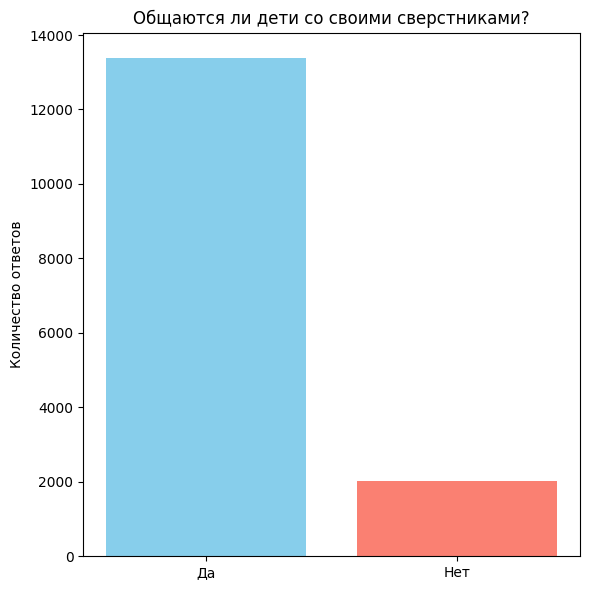

In [ ]:
# Построение графика о социальной адаптации детей
if sport_answer_counts['Да'] + sport_answer_counts['Нет'] > 0:
    labels_sport = list(sport_answer_counts.keys())
    counts_sport = list(sport_answer_counts.values())
    plt.figure(figsize=(6, 6))
    plt.bar(labels_sport, counts_sport, color=['skyblue', 'salmon'])
    plt.title('Общаются ли дети со своими сверстниками? Данные по всем детям за 10 лет')
    plt.ylabel('Количество ответов')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [ ]:
print(f"\nОбщее количество родителей: {total_parents}")
print("\nОбщее распределение по группам брачного статуса:")
print(marital_status_counts)
print("\nОбщее количество ответов на вопрос о социальной адаптации:")
print(sport_answer_counts)


Общее количество родителей: 77015

Общее распределение по группам брачного статуса:
{'Родители в браке': 53422, 'Одинокие родители': 15721, 'Разведен': 7811}

Общее количество ответов на вопрос о социальной адаптации:
{'Да': np.int64(13396), 'Нет': np.int64(2009)}


**Вывод:** По итогам нашего исследования гипотеза подтверждает, что семейное положение родителей (в браке они или нет) никак не влияет на социальную адаптацию детей. На графике, отвечающий за социальную адаптацию, видно, что большая часть детей (более 80%) имеет хорошие взаимоотношения со сверстниками (вопрос: встречаются ли (он/она) со сверстниками после школы?). При этом семейный статус родителей имеет не такой большой перевес в сторону людей в браке. Поэтому мы можем сделать вывод, что оба параметра не взаимосвязаны, что подтверждает нашу гипотезу

# Взаимосвязь между родителями и детьми, которые занимаются спортам

**Гипотеза:** Нет прямого или косвенного влияния родительского поощрения на спортивные ценности подростков и отсев из спорта. Возможно, присутствует лишь небольшое влияние родителей.

Подтверждающие исследования:
- Darun Jaf, Stefan Wagnsson, Therése Skoog, Terese Glatz, Metin Özdemir,
The interplay between parental behaviors and adolescents' sports-related values in understanding adolescents' dropout of organized sports activities, Psychology of Sport and Exercise, Volume 68, 2023, 102448,
ISSN 1469-0292,
https://doi.org/10.1016/j.psychsport.2023.102448.
- Lynn L. Moore, David A. Lombardi, Mary Jo White, James L. Campbell, Susan A. Oliveria, R. Curtis Ellison,
Influence of parents' physical activity levels on activity levels of young children, The Journal of Pediatrics, Volume 118, Issue 2, 1991, Pages 215-219,
ISSN 0022-3476,
https://doi.org/10.1016/S0022-3476(05)80485-8.

In [ ]:
# Функция для визуализации (агрегированные данные)
def plot_sport_results(data, title, color_yes='#4CAF50', color_no='#F44336'):
    if data['Занимаются'] + data['Не занимаются'] > 0:
        labels = list(data.keys())
        counts = list(data.values())
        plt.figure(figsize=(6, 6))
        plt.bar(labels, counts, color=[color_yes, color_no])
        plt.title(title)
        plt.ylabel('Количество респондентов')
        plt.show()

In [ ]:
import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt
import glob

# Словарь для префиксов переменных по волнам
keys = {
    32: 'bb', 31: 'aa', 30: 'z', 29: 'y', 28: 'x',
    27: 'w', 26: 'v', 25: 'u', 24: 't', 23: 's'
}

# Словари для хранения агрегированных результатов
parents_sport_counts = {'Занимаются': 0, 'Не занимаются': 0}
children_sport_counts = {'Занимаются': 0, 'Не занимаются': 0}
total_parents = 0
total_children = 0

# Обработка каждой волны
for wave in range(28, 33):
    file_pattern = f'r{wave}i*.sav'
    file_list = glob.glob(file_pattern)
    file_path = file_list[0]
    df, meta = pyreadstat.read_sav(file_path)

    child_var = f'{keys[wave]}j72.171'
    parent_sport_var = f'{keys[wave]}m113a'
    child_sport_var = f'{keys[wave]}k7.4'

    # 1. Фильтрация и анализ спорта среди родителей
    if child_var in df.columns and parent_sport_var in df.columns:
        parents_with_children = df[df[child_var].replace([99999997, 99999998, 99999999], pd.NA) == 1].copy()
        if not parents_with_children.empty:
            clean_parents_sport = parents_with_children[parent_sport_var].replace([99999997, 99999998, 99999999],
                                                                                  pd.NA).dropna()
            parents_sport_counts['Занимаются'] += (clean_parents_sport == 1).sum()
            parents_sport_counts['Не занимаются'] += (clean_parents_sport != 1).sum()
            total_parents += len(parents_with_children)

    # 2. Анализ спорта среди детей
    if child_sport_var in df.columns:
        clean_children_sport = df[child_sport_var].replace([99999997, 99999998, 99999999], pd.NA).dropna()
        children_sport_counts['Занимаются'] += (clean_children_sport == 1).sum()
        children_sport_counts['Не занимаются'] += (clean_children_sport != 1).sum()
        total_children += len(df)

    del df
    del meta

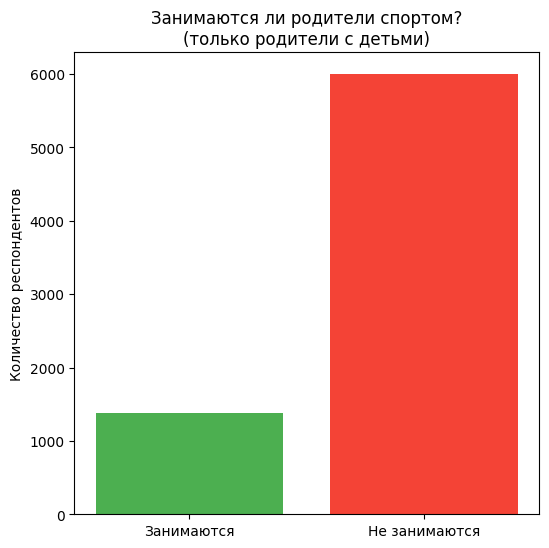

In [ ]:
# Визуализация занятий спортом среди родителей
plot_sport_results(parents_sport_counts, 'Занимаются ли родители спортом? Данные за 10 лет')

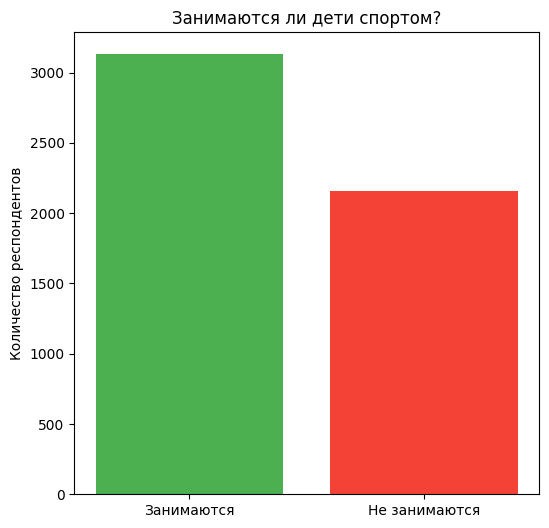

In [ ]:
# Визуализация занятий спортом среди детей
plot_sport_results(children_sport_counts, 'Занимаются ли дети спортом? Данные за 10 лет')

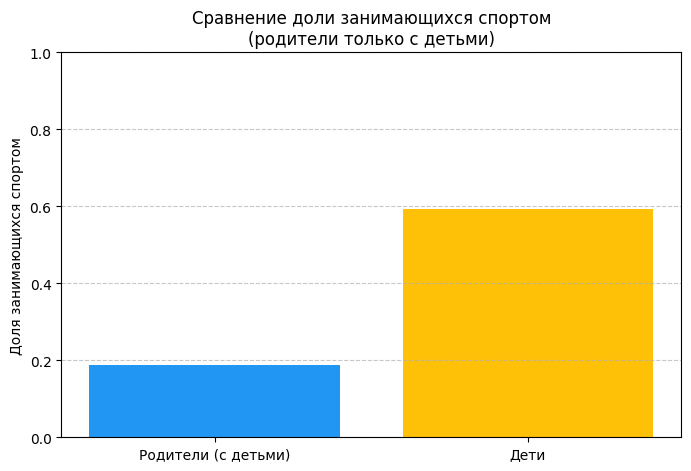

In [ ]:
# Сравнительная визуализация (доля занимающихся)
total_parents_sport = parents_sport_counts['Занимаются'] + parents_sport_counts['Не занимаются']
total_children_sport = children_sport_counts['Занимаются'] + children_sport_counts['Не занимаются']

parents_sport = parents_sport_counts['Занимаются'] / total_parents_sport
children_sport = children_sport_counts['Занимаются'] / total_children_sport

plt.figure(figsize=(8, 5))
plt.bar(['Родители', 'Дети'], [parents_sport, children_sport], color=['#2196F3', '#FFC107'])
plt.title('Сравнение доли занимающихся спортом')
plt.ylabel('Доля занимающихся спортом')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Вывод:** Несмотря на то, что больше половины детей занимаются спортом, их родители в большинстве случае не тратят время на это. И даже если это влияние есть, то небольшое. Это подтверждает гипотезу, которую мы выдвинули на основе приведенных исследований.

# Общий вывод по трем гипотезам

В ходе нашего исследования мы проанализировали три гипотезы, каждая из которых касалась различных факторов влияющих на здоровье и социальное поведение детей в обществе. Результаты полученные нами подтверждают, что высокий уровень дохода семьи влияет на качественное медицинское обслуживание, что влияет на здоровье детей. Однако семейное положение родителей не оказывает сильного влияния на социальную адаптацию у ребенка,  так как влияют множество других факторов такие как воспитание и среда детей. А также мы поняли, что влияние родителей на участие детей в спортивных активностях, остается минимальным. Результаты исследования подтверждают важность материального положения семьи и родительского вовлечения в воспитание ребенка.

# Авторы исследования:

- Кузменок Валерия БЭАД245
- Сарсенбекова Умай БЭАД245